# Students Performance in Exams
## by Sara Mohammad El-Begermy

<center> <b> Right to education </b> </center>  
Education as a fundamental human right lies at the heart of UNESCO’s mission and is enshrined in the Universal Declaration of Human Rights (1948) and many other international human rights instruments.

Therefore, the purpose of the following findings is not discrimination. Rather, the purpose is to help improve education whether you are:
1. Working in the education sector
2. Parent
3. Student

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [24]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('StudentsPerformance.csv')
# make total score
data['total percentage'] = (data['math score']+data['reading score']+data['writing score'])/3
#order parental level of education
order_education=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
data['parental level of education'] = pd.Categorical(data['parental level of education'], order_education, ordered=True)
#order races according to name
race_order = np.sort(data['race/ethnicity'].unique())
data['race/ethnicity'] = pd.Categorical(data['race/ethnicity'], race_order, ordered=True)


## How much the scores follow the normal distribution?

> The scores almost fit into normal distribution greatly, although not fitting 100%. Good for the exam designer!! ☺️ 

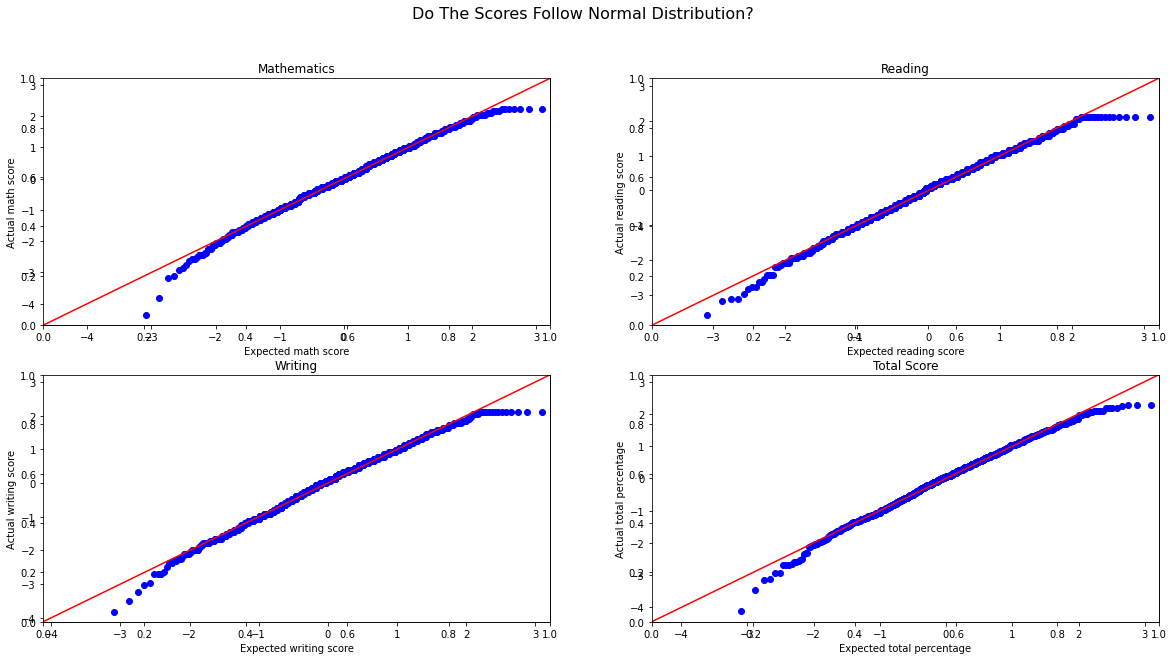

In [25]:
#put 4 plots here to easily compare
fig, ax = plt.subplots(2, 2, figsize=(20, 10));
ax = ax.flatten();

fig.suptitle('Do The Scores Follow Normal Distribution?', fontsize=16);

ax[0] = fig.add_subplot(2,2,1);#2 rows, 2 columns, position (1,1)
sm.qqplot(data['math score'], fit=True, line='45', ax=ax[0]);
ax[0].set_xlabel('Expected math score');
ax[0].set_ylabel('Actual math score');
ax[0].set_title('Mathematics');

ax[1] = fig.add_subplot(2,2,2);
sm.qqplot(data['reading score'], fit=True, line='45', ax=ax[1]);
ax[1].set_xlabel('Expected reading score');
ax[1].set_ylabel('Actual reading score');
ax[1].set_title('Reading');

ax[2] = fig.add_subplot(2,2,3);
sm.qqplot(data['writing score'], fit=True, line='45', ax=ax[2]);
ax[2].set_xlabel('Expected writing score');
ax[2].set_ylabel('Actual writing score');
ax[2].set_title('Writing');

ax[3] = fig.add_subplot(2,2,4);
sm.qqplot(data['total percentage'], fit=True, line='45', ax=ax[3]);
ax[3].set_xlabel('Expected total percentage');
ax[3].set_ylabel('Actual total percentage');
remove_output = ax[3].set_title('Total Score');

## What are the fields of interest for females and males?

> In average, males are better in mathematics while females are better in language skills (reading and writing).        
Females are more diverse in their scores and they have more far outliers.

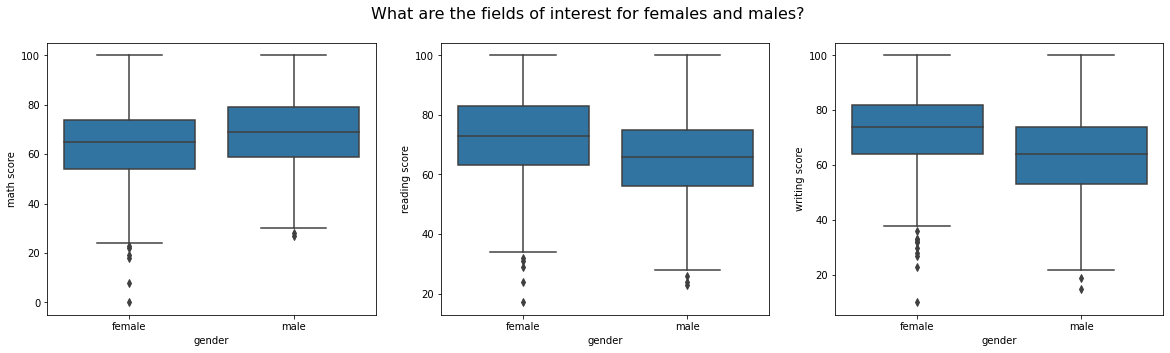

In [26]:
fig = plt.figure(figsize=[20,5])
fig.suptitle('What are the fields of interest for females and males?', fontsize=16);

plt.subplot(1,3,1)
sb.boxplot(data=data, x='gender', y='math score', color=sb.color_palette()[0]);

plt.subplot(1,3,2)
sb.boxplot(data=data, x='gender', y='reading score', color=sb.color_palette()[0]);

plt.subplot(1,3,3)
sb.boxplot(data=data, x='gender', y='writing score', color=sb.color_palette()[0]);

## Does lunch affect students score?

> Actually yes!  
> On average, students who eat the standard meal scored more than who eat the free meal

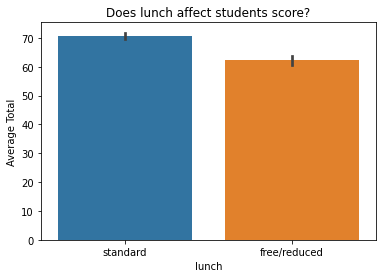

In [27]:
sb.barplot(data=data, y='total percentage', x='lunch'); #estimator = mean by default
plt.ylabel('Average Total');
plt.title('Does lunch affect students score?');

## Does parent education affect students score?

> Actually yes!        
> The minimum total score increases as the education level of parents increases

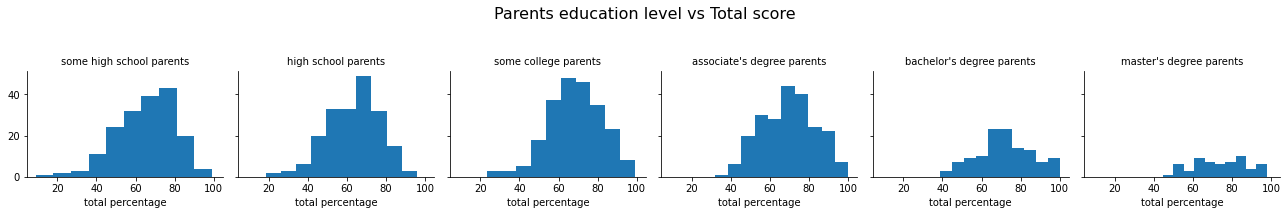

In [28]:
fg = sb.FacetGrid(data=data, col='parental level of education');
fg.fig.suptitle('Parents education level vs Total score\n', fontsize=16);
fg.map(plt.hist, 'total percentage');
fg.set_titles(col_template="{col_name} parents");


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [31]:
#jupyter nbconvert slide_deck_students_performance.ipynb --to slides --post serve --template output_toggle
!jupyter nbconvert slide_deck_students_performance.ipynb --to slides --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_students_performance.ipynb to slides
[NbConvertApp] Writing 716316 bytes to slide_deck_students_performance.slides.html
